# Logistic Regression

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Online%20Shoppers%20Intention.csv')

In [ ]:
dataset.apply(pd.Series.nunique)

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [ ]:
dataset.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

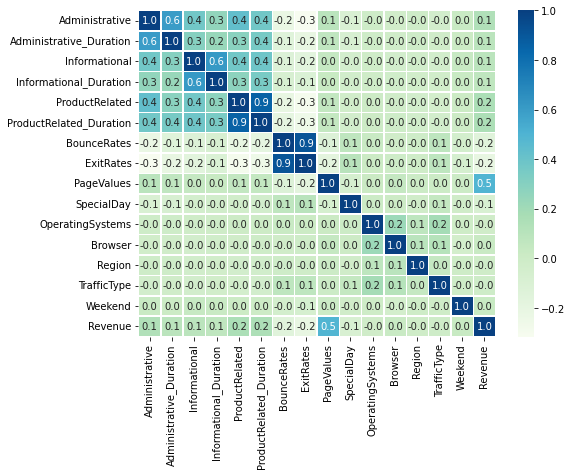

In [ ]:
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(dataset.corr(), cmap="GnBu", annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


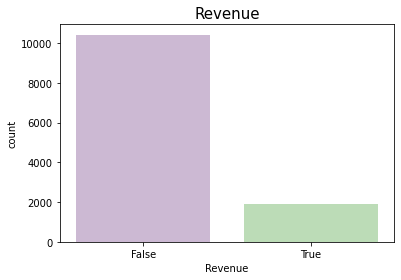

In [ ]:
sns.countplot(dataset.Revenue, palette="PRGn")
plt.title("Revenue",fontsize=15)
plt.show()

In [ ]:
dataset.shape

(12330, 18)

In [ ]:
print(dataset.isna().sum())
dataset = dataset.dropna()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [ ]:
dataset = dataset.drop('Month', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,Returning_Visitor,True,False


In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X[:,-1] = le.fit_transform(X[:,-1])
X

array([[0.0, 0.0, 0.0, ..., 1, 'Returning_Visitor', 0],
       [0.0, 0.0, 0.0, ..., 2, 'Returning_Visitor', 0],
       [0.0, -1.0, 0.0, ..., 3, 'Returning_Visitor', 0],
       ...,
       [0.0, 0.0, 0.0, ..., 13, 'Returning_Visitor', 1],
       [4.0, 75.0, 0.0, ..., 11, 'Returning_Visitor', 0],
       [0.0, 0.0, 0.0, ..., 2, 'New_Visitor', 1]], dtype=object)

In [ ]:
le2 = LabelEncoder()
X[:,-2] = le2.fit_transform(X[:,-2])
X

array([[0.0, 0.0, 0.0, ..., 1, 2, 0],
       [0.0, 0.0, 0.0, ..., 2, 2, 0],
       [0.0, -1.0, 0.0, ..., 3, 2, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 13, 2, 1],
       [4.0, 75.0, 0.0, ..., 11, 2, 0],
       [0.0, 0.0, 0.0, ..., 2, 0, 1]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=101)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(random_state = 0, criterion='entropy')
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
GBclassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GBclassifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
y_predlog = logmodel.predict(X_test)
y_predDT = DTclassifier.predict(X_test)
y_predGB = GBclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmlog = confusion_matrix(y_test, y_predlog)
acclog = accuracy_score(y_test, y_predlog)
print("ACCURACY OF LOGISTIC REGRESSION:",acclog)

ACCURACY OF LOGISTIC REGRESSION: 0.8844384303112314


In [ ]:
print("CONFUSION MATRIX OF LOGISTIC REGRESSION")
print(cmlog)

CONFUSION MATRIX OF LOGISTIC REGRESSION
[[3041   74]
 [ 353  227]]


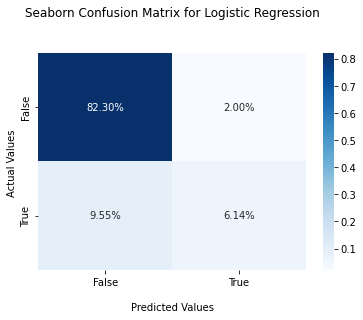

In [ ]:
ax = sns.heatmap(cmlog/np.sum(cmlog), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix for Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report of Logistic Regression")
print(classification_report(y_test, y_predlog))


Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      3115
           1       0.75      0.39      0.52       580

    accuracy                           0.88      3695
   macro avg       0.83      0.68      0.72      3695
weighted avg       0.87      0.88      0.87      3695



In [ ]:
cmdt = confusion_matrix(y_test, y_predDT)
accdt = accuracy_score(y_test, y_predDT)
print("ACCURACY OF DECISION TREE:",accdt)


ACCURACY OF DECISION TREE: 0.8554803788903924


In [ ]:
print("CONFUSION MATRIX OF DECISION TREE")
print(cmdt)

CONFUSION MATRIX OF DECISION TREE
[[2825  290]
 [ 244  336]]


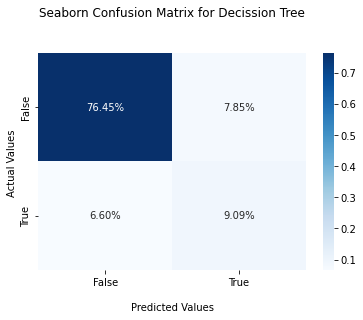

In [ ]:
ax = sns.heatmap(cmdt/np.sum(cmdt), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix for Decission Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report of Decision Tree")
print(classification_report(y_test, y_predDT))


Classification Report of Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3115
           1       0.54      0.58      0.56       580

    accuracy                           0.86      3695
   macro avg       0.73      0.74      0.74      3695
weighted avg       0.86      0.86      0.86      3695



In [ ]:
cmgb = confusion_matrix(y_test, y_predGB)
accgb = accuracy_score(y_test, y_predGB)
print("ACCURACY OF GRADIENT BOOSTING",accgb)


ACCURACY OF GRADIENT BOOSTING 0.887956698240866


In [ ]:
print("CONFUSION MATRIX OF GRADIENT BOOSTING")
print(cmgb)

CONFUSION MATRIX OF GRADIENT BOOSTING
[[2938  177]
 [ 237  343]]


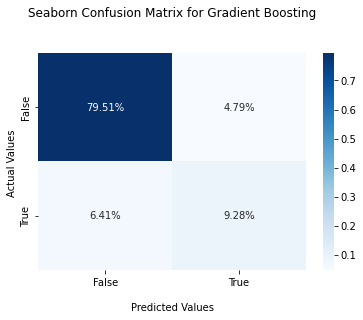

In [ ]:
ax = sns.heatmap(cmgb/np.sum(cmgb), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix for Gradient Boosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report of Gradient Boosting")
print(classification_report(y_test, y_predGB))


Classification Report of Gradient Boosting
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3115
           1       0.66      0.59      0.62       580

    accuracy                           0.89      3695
   macro avg       0.79      0.77      0.78      3695
weighted avg       0.88      0.89      0.89      3695

